# 1. 確認是否使用 GPU 進行推論

In [1]:
! nvidia-smi

Wed Jun  8 14:48:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 2. 下載 Darknet 框架

In [2]:
! git clone https://github.com/AlexeyAB/darknet


Cloning into 'darknet'...
remote: Enumerating objects: 15424, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 15424 (delta 0), reused 0 (delta 0), pack-reused 15423
Receiving objects: 100% (15424/15424), 14.05 MiB | 9.63 MiB/s, done.
Resolving deltas: 100% (10364/10364), done.


# 3. 開始 GPU , CUDNN 功能並執行編譯

In [3]:
%cd darknet
! sed -i "s/GPU=0/GPU=1/g" Makefile
! sed -i "s/CUDNN=0/CUDNN=1/g" Makefile
! sed -i "s/CUDNN_HALF=0/CUDNN_HALF=1/g" Makefile
! sed -i "s/OPENCV=0/OPENCV=1/g" Makefile

/content/darknet


In [4]:
! make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

# 4. 下載自行標註資料並訓練完成, YoloV4_Tiny 模型檔案及相關設定
訓練過程可參考 : https://github.com/tongysmember/Yolo-fastest-and-Tiny/blob/main/ipynb/yolov4_tiny_training_Colab.ipynb  
自行搜集與標註資料：https://github.com/tongysmember/Yolov4-tiny_Colab_User_Datasets


In [5]:
% cd ../
% cd ./content
! git clone https://github.com/tongysmember/Yolo-fastest-and-Tiny

/content
[Errno 2] No such file or directory: './content'
/content
Cloning into 'Yolo-fastest-and-Tiny'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 81 (delta 25), reused 42 (delta 14), pack-reused 28
Unpacking objects: 100% (81/81), done.


# 5. 搬移模型及相關設定檔案

In [6]:
% cd Yolo-fastest-and-Tiny
!cp ./my_yolov4-tiny-custom.cfg ../darknet/cfg/my_yolov4-tiny-custom.cfg
!cp ./my_yolov4-tiny-custom_best.weights ../darknet/cfg/my_yolov4-tiny-custom_best.weights
!cp ./data/my_obj.data ../darknet/data/my_obj.data
!cp ./data/my_obj.names ../darknet/data/my_obj.names
!cp ./data/3.png ../darknet/data/3.png

/content/Yolo-fastest-and-Tiny


In [7]:
! sed -n -e 4p -e 5p -e 6p -e 834p -e 841p -e 910p -e 917p ../darknet/cfg/my_yolov4-tiny-custom.cfg

#subdivisions=1
# Training
batch=64


# 6. 透過 Darknet 模型進行推論
輕量裝置上程式可透過 OpenCV 推論, 可參考 : https://github.com/tongysmember/Yolo-fastest-and-Tiny/blob/main/Yolo-Detect-CNT.py  


/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 

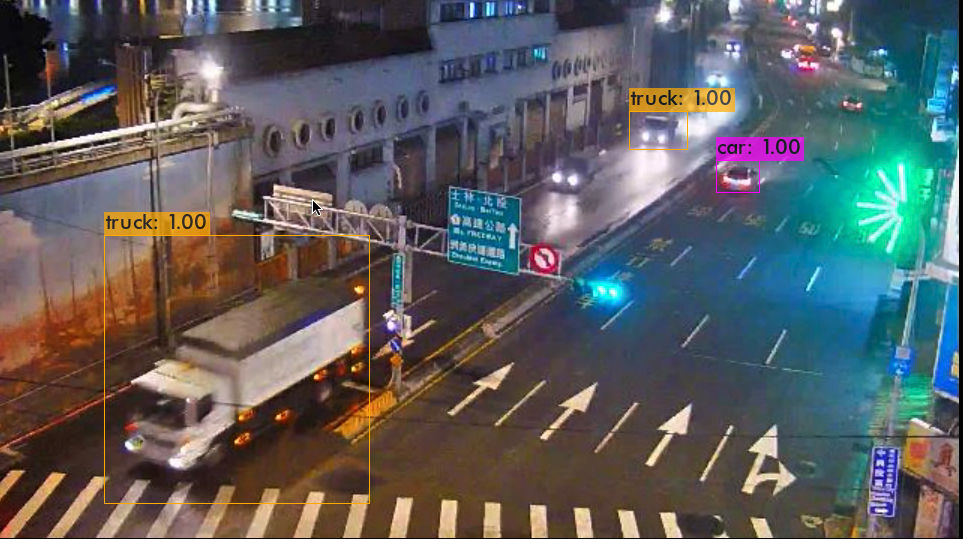

In [8]:
%cd ../darknet
!./darknet detector test data/my_obj.data ./cfg/my_yolov4-tiny-custom.cfg ./cfg/my_yolov4-tiny-custom_best.weights  data/3.png
import cv2 # 導入OpenCV函式庫
from google.colab.patches import cv2_imshow # 導入Colab.patches函式庫

imgResult = cv2.imread('predictions.jpg') # 讀入結果影像
cv2_imshow(imgResult) # 顯示結果影像